In [1]:
import altair as alt
import pandas as pd
# from fuzzywuzzy import fuzz
# from fuzzywuzzy import process
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Postulaciones a proyectos
URL = '../data/ANID/POSTULACIONES_2016_2020.csv'
df_postulaciones = pd.read_csv(URL, sep=';')
df_postulaciones2 = pd.read_csv(URL, sep=';')

# Adjudicaciones de proyectos
URL = '../data/ANID/BDH_Proyectos.csv'
df_adjudicaciones = pd.read_csv(URL, sep=';', encoding='latin-1')

In [2]:
aux = df_postulaciones[df_postulaciones['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO']

aux[' MONTO TOTAL ADJUDICADO (M$) '].unique()

aux['DISCIPLINA OECD'].unique()

array(['CIENCIAS SOCIALES', 'CIENCIAS NATURALES',
       'CIENCIAS MEDICAS Y DE LA SALUD', 'INGENIERIA Y TECNOLOGIA',
       'HUMANIDADES', 'CIENCIAS AGRICOLAS', 'MULTIDISCIPLINARIO',
       'SIN INFORMACION', 'NO APLICA'], dtype=object)

In [3]:
df_postulaciones 

,CODIGO DEL PROYECTO,SUBDIRECCION,PROGRAMA,INSTRUMENTO,NOMBRE DEL CONCURSO,MONTO TOTAL ADJUDICADO (M$),ESTADO_RESOLUCION_CONCURSO,DISCIPLINA OECD,REGION DE EJECUCION,TIPO DE BENEFICIARIO,TIPO DE INSTITUCION,SEXO,AÑO DE FALLO,MACRO ZONA
0,21160001,CAPITAL HUMANO,PFCHA,CONICYT NACIONAL - DOCTORADO,DOCTORADO NACIONAL 2016,$-,NO ADJUDICADO,CIENCIAS NATURALES,13. METROPOLITANA,PERSONA NATURAL,UNIVERSIDAD,HOMBRE,2016,RM
1,21160002,CAPITAL HUMANO,PFCHA,CONICYT NACIONAL - DOCTORADO,DOCTORADO NACIONAL 2016,SE IDENTIFICA AL CIERRE DE LA BECA,ADJUDICADO,CIENCIAS SOCIALES,05. VALPARAISO,PERSONA NATURAL,UNIVERSIDAD,MUJER,2016,CENTRO
2,21160003,CAPITAL HUMANO,PFCHA,CONICYT NACIONAL - DOCTORADO,DOCTORADO NACIONAL 2016,SE IDENTIFICA AL CIERRE DE LA BECA,ADJUDICADO,CIENCIAS SOCIALES,EXTRANJERO,PERSONA NATURAL,UNIVERSIDAD,MUJER,2016,EXTRANJERO
3,21160004,CAPITAL HUMANO,PFCHA,CONICYT NACIONAL - DOCTORADO,DOCTORADO NACIONAL 2016,$-,NO ADJUDICADO,INGENIERIA Y TECNOLOGIA,02. ANTOFAGASTA,PERSONA NATURAL,UNIVERSIDAD,MUJER,2016,NORTE
4,21160005,CAPITAL HUMANO,PFCHA,CONICYT NACIONAL - DOCTORADO,DOCTORADO NACIONAL 2016,SE IDENTIFICA AL CIERRE DE LA BECA,ADJUDICADO,CIENCIAS NATURALES,EXTRANJERO,PERSONA NATURAL,UNIVERSIDAD,HOMBRE,2016,EXTRANJERO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71629,VCE200007,REC,REC,CAPITAL SOCIAL - VCE,X CONCURSO DE PROYECTOS DE VINCULACION CIENCIA...,$-,NO ADJUDICADO,CIENCIAS AGRICOLAS,06. OHIGGINS,PERSONA JURIDICA,UNIVERSIDAD,HOMBRE,2020,CENTRO SUR
71630,VCE200008,REC,REC,CAPITAL SOCIAL - VCE,X CONCURSO DE PROYECTOS DE VINCULACION CIENCIA...,$-,NO ADJUDICADO,CIENCIAS AGRICOLAS,06. OHIGGINS,PERSONA JURIDICA,UNIVERSIDAD,MUJER,2020,CENTRO SUR
71631,VCE200009,REC,REC,CAPITAL SOCIAL - VCE,X CONCURSO DE PROYECTOS DE VINCULACION CIENCIA...,$-,NO ADJUDICADO,CIENCIAS AGRICOLAS,06. OHIGGINS,PERSONA JURIDICA,IPSFL,HOMBRE,2020,CENTRO SUR
71632,VCE200010,REC,REC,CAPITAL SOCIAL - VCE,X CONCURSO DE PROYECTOS DE VINCULACION CIENCIA...,$-,NO ADJUDICADO,CIENCIAS AGRICOLAS,06. OHIGGINS,PERSONA JURIDICA,IPSFL,MUJER,2020,CENTRO SUR


In [41]:
df_adjudicaciones['SUBDIRECCION'].unique()

array(['PROYECTOS DE INVESTIGACION', 'INVESTIGACION APLICADA', 'CENTROS',
       'NO APLICA', 'REC'], dtype=object)

In [42]:
# Trabajar con información de postulaciones
df_filtered = df_postulaciones[df_postulaciones['DISCIPLINA OECD'].isin(['CIENCIAS MEDICAS Y DE LA SALUD', 'MEDICINA Y CIENCIAS DE LA SALUD'])].copy()
df_filtered2 = df_adjudicaciones[df_adjudicaciones['AREA_OCDE'].isin(['CIENCIAS MEDICAS Y DE LA SALUD'])].copy()

In [43]:
# Solo para información
df_filtered['MACRO ZONA'].unique(), df_filtered.columns, df_filtered['DISCIPLINA OECD'].unique()

(array(['CENTRO', 'RM', 'CENTRO SUR', 'SUR', 'EXTRANJERO', 'NORTE',
        'AUSTRAL', 'SIN INFORMACION', 'MULTIREGIONAL'], dtype=object),
 Index(['CODIGO DEL PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO',
        'NOMBRE DEL CONCURSO', ' MONTO TOTAL ADJUDICADO (M$) ',
        'ESTADO_RESOLUCION_CONCURSO', 'DISCIPLINA OECD', 'REGION DE EJECUCION',
        'TIPO DE BENEFICIARIO', 'TIPO DE INSTITUCION', 'SEXO', 'AÑO DE FALLO',
        'MACRO ZONA'],
       dtype='object'),
 array(['CIENCIAS MEDICAS Y DE LA SALUD',
        'MEDICINA Y CIENCIAS DE LA SALUD'], dtype=object))

# 2. Cuántos proyectos se postulan, cuál es la tasa de adjudicación para la Macrozona Centro Sur y cuánto representa esto del total de proyectos adjudicados en el país. 

In [44]:
df_2 = df_filtered[df_filtered['SUBDIRECCION'] == 'PROYECTOS DE INVESTIGACION'].copy()
df_2b = df_2.copy() # copia para mas adelante
df_2 = df_2.groupby(['MACRO ZONA', 'ESTADO_RESOLUCION_CONCURSO'])\
      .agg({'CODIGO DEL PROYECTO': 'count'})\
      .rename(columns={'CODIGO DEL PROYECTO': 'COUNT'})
#Tasa de adjudicación por macrozona (adjudicados/ !adjudicados)
df_2['TASA'] = df_2.groupby(level=0).apply(lambda x: x/x.sum())
df_2 = df_2.reset_index()
#ordenando por mapa
df_2['MACRO ZONA'] = pd.Categorical(df_2['MACRO ZONA'], ["NORTE","CENTRO","CENTRO SUR","SUR","AUSTRAL","RM",'SIN INFORMACION'])
df_2 = df_2.sort_values("MACRO ZONA")
df_2c = df_2.copy()  #guardamos copia para después
df_2d = df_2.copy()  #guardamos copia para después
df_2 = df_2[df_2["ESTADO_RESOLUCION_CONCURSO"] == "ADJUDICADO"]
# tasa de adjudicación macrozona vs total nacional (adjudicados_macrozona / adjudicados_nacional)
df_2['TASA NACIONAL'] =(df_2.COUNT /df_2.COUNT.sum())

df_2

,MACRO ZONA,ESTADO_RESOLUCION_CONCURSO,COUNT,TASA,TASA NACIONAL
8,NORTE,ADJUDICADO,3,0.103448,0.007812
2,CENTRO,ADJUDICADO,17,0.202381,0.044271
5,CENTRO SUR,ADJUDICADO,23,0.129944,0.059896
18,SUR,ADJUDICADO,31,0.216783,0.080729
0,AUSTRAL,ADJUDICADO,2,0.333333,0.005208
12,RM,ADJUDICADO,308,0.283088,0.802083


In [45]:
#datos solicitados}
print('[NACIONAL]Postulaciones: '+ str(len(df_2b)) ) #considera total nacional
print('[NACIONAL] Postulaciones adjudicadas: '+ str(len(df_2b[df_2b['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO'])))
print('[NACIONAL] Tasa de adjudicación: '+ str("%.2f" %(len(df_2b[df_2b['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO']) / len(df_2b) *100 )) + '%')
#Solo considera total de postulaciones macrozona
df_macrozona = df_2b[df_2b['MACRO ZONA']=='CENTRO SUR']
print('Tasa adjudicación macrozona centro-sur: ' + str("%.2f" %((len(df_macrozona[df_macrozona['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO'])/len(df_macrozona))*100)) + '%' )
# Comparación aprobación nacional con aprobación macrozona
print('Porcentaje macrozona vs total nacional: '+ str('%.2f'%((len(df_macrozona[df_macrozona['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO'])/len(df_2b[df_2b['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO']))*100 ))+'%')

#graficos
scale = alt.Scale(domain=["NACIONAL", "ADJUDICACIÓN" , 'NODO CTCI CENTRO SUR'], #option 1
                  range=['cyan','navy','red'])

#scale = alt.Scale(domain=['NACIONAL', 'ADJUDICACIÓN'], #option 2
#                  range=['cyan','navy'])

chart1 =  alt.Chart(df_2).mark_bar().encode(
            x = alt.X('TASA', scale=alt.Scale(domain=[0, 0.9]), 
                      axis=alt.Axis(format='%'),title=None),
            y = alt.Y('MACRO ZONA',title=None,sort=None),
            tooltip=[alt.Tooltip('COUNT', title='Cantidad')],
            color=alt.condition(
                alt.datum['MACRO ZONA'] == 'CENTRO SUR',  # boolean
                alt.value('red'),     # if it's true
                alt.value('navy')   # else
            )
          )
text =  chart1.mark_text(align='left', baseline='middle', dx=10).encode(
          text = alt.Text("TASA", format=".2%")
        )

chart1 = chart1+text
chart1.properties(width=500, height=200,
    title=['Tasa de adjudicación proyectos','en ciencias médicas y de salud','']
).configure_legend(titleFontSize=14,labelFontSize=10).configure_title(
    fontSize=20, font='Arial', anchor='middle',color='black'
  )



[NACIONAL]Postulaciones: 1544
[NACIONAL] Postulaciones adjudicadas: 384
[NACIONAL] Tasa de adjudicación: 24.87%
Tasa adjudicación macrozona centro-sur: 12.99%
Porcentaje macrozona vs total nacional: 5.99%


alt.LayerChart(...)

In [46]:
chart1 =  alt.Chart(df_2).mark_bar().encode(
            x = alt.X('TASA NACIONAL', scale=alt.Scale(domain=[0, 1]), 
                      axis=alt.Axis(format='%'),title=None),
            y = alt.Y('MACRO ZONA',title=None,sort=None),
            tooltip=[alt.Tooltip('COUNT', title='Cantidad')],
            color=alt.condition(
                alt.datum['MACRO ZONA'] == 'CENTRO SUR',  # boolean
                alt.value('red'),     # if it's true
                alt.value('navy')   # else
            )
          )
text =  chart1.mark_text(align='left', baseline='middle', dx=10).encode(
          text = alt.Text("TASA NACIONAL", format=".2%")
        )

chart1 = chart1+text
chart1.properties(width=500, height=200,
    title=['Tasa de participación en adjudicación nacional','de proyectos en ciencias médicas y de salud','']
).configure_legend(titleFontSize=14,labelFontSize=10).configure_title(
    fontSize=20, font='Arial', anchor='middle',color='black'
  )

alt.LayerChart(...)

In [47]:
alt.Chart(df_2c).mark_bar().encode(
    x = alt.X('TASA', stack="normalize", axis=alt.Axis(format='%'), title=None),
    y = alt.Y('MACRO ZONA',sort=None,title=None),
    color = alt.Color('ESTADO_RESOLUCION_CONCURSO',
                      title='Resolución',scale=alt.Scale(scheme='dark2')),
    tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
              alt.Tooltip('COUNT', title='Cantidad')]
).properties(
    title=['Postulaciones nacionales proyectos','de ciencias médicas y de salud',""]
).configure_legend(titleFontSize=14,labelFontSize=10).configure_title(
    fontSize=20, font='Arial', anchor='middle',color='black'
  )

alt.Chart(...)

In [48]:
# Explorando visualizaciones por región 
df_mcrz_reg = df_macrozona.copy()
df_mcrz_reg = df_mcrz_reg.groupby(['REGION DE EJECUCION', 'ESTADO_RESOLUCION_CONCURSO'])\
      .agg({'CODIGO DEL PROYECTO': 'count'})\
      .rename(columns={'CODIGO DEL PROYECTO': 'COUNT'})
#particiona en porcentajes las posibles resoluciones por cada región
df_mcrz_reg['TASA'] = df_mcrz_reg.groupby(level=0).apply(lambda x: x/x.sum())


alt.Chart(df_mcrz_reg.reset_index()).mark_bar().encode(
    x = alt.X('TASA', stack="normalize", axis=alt.Axis(format='%'), title=None),
    y = alt.Y('REGION DE EJECUCION',sort=None,title=None),
    color = alt.Color('ESTADO_RESOLUCION_CONCURSO',
                      title='Resolución',scale=alt.Scale(scheme='dark2')),
    tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
              alt.Tooltip('COUNT', title='Cantidad')]
).properties(
    title=['Postulaciones Macrozona Centro-Sur proyectos','de ciencias médicas y de salud',""]
).configure_legend(titleFontSize=14,labelFontSize=10).configure_title(
    fontSize=20, font='Arial', anchor='middle',color='black'
  )

alt.Chart(...)

# 3. Dentro de la Macrozona, cuáles son las universidades que mayor tasa de adjudicación tienen.


In [49]:
df_3 = df_filtered2[df_filtered2['SUBDIRECCION'].isin(['PROYECTOS DE INVESTIGACION','INVESTIGACION APLICADA'])].copy()
df_3 = df_3[df_3['REGION_EJECUCION'].isin(['06. OHIGGINS','07. MAULE','08. BIOBIO','16. Ã\x91UBLE'])] #no existen datos de ñuble
# TO PREVENT ERRORS
def change_name (inst):
    return inst.replace('UNIV.DE','UNIVERSIDAD DE') 
df_3['INSTITUCION_PRINCIPAL'] = df_3['INSTITUCION_PRINCIPAL'].apply(change_name)
# filtrado solo de universidades
df_3 = df_3[df_3['INSTITUCION_PRINCIPAL'].str.contains("UNIVERSIDAD")]
df_3 = df_3.groupby(['INSTITUCION_PRINCIPAL','REGION_EJECUCION'])\
      .agg({'CODIGO_PROYECTO': 'count'})\
      .rename(columns={'CODIGO_PROYECTO': 'COUNT'})
#tasa auxiliar para el display
df_3['aux'] = df_3.groupby(level=0).apply(lambda x: x/x.sum())
# la tasa es el porcentaje de participación dentro de la macrozona
df_3['TASA'] = ((df_3.COUNT / df_3.COUNT.sum()))

df_3 = df_3.reset_index()

In [50]:


aux = df_3.groupby(['INSTITUCION_PRINCIPAL']).agg({'COUNT':'sum','TASA':'sum'})
aux = aux.reset_index().sort_values("TASA", axis=0,ascending=False)

text3 = alt.Chart(aux).mark_text(align='left', baseline='middle', dx=10).encode(
        x = alt.X('TASA',sort=None),
        y = alt.Y('INSTITUCION_PRINCIPAL',sort=None),
        text=alt.Text('TASA', format=".2%")
)

chart3 = alt.Chart(df_3.reset_index()).mark_bar().encode(
            x = alt.X('TASA', scale=alt.Scale(domain=[0, 1]),
                axis=alt.Axis(format='%'), sort=None,title=None),
            y = alt.Y('INSTITUCION_PRINCIPAL',sort=None,title=None),
            tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
                        alt.Tooltip('COUNT', title='Cantidad'),
                        alt.Tooltip('INSTITUCION_PRINCIPAL', title='Institución')],
             color = alt.Color('REGION_EJECUCION',
                      title='Región de ejecución',scale=alt.Scale(scheme='sinebow'))

          )


#text3 = chart3.mark_text(align='left', baseline='middle', dx=10).encode(
#          text=alt.Text('TASA', format=".2%")
#        )

# Del gráficos se desprende que la universidad de concepción monopoliza las adjudicaciones
# de la macrozona

# la universidad autónoma es la unica que participa en más de una región
# ñuble no registra adjudicaciones

(text3+chart3).properties(
      title=['Tasa de adjudicación por institución', 'proyectos ciencias medicas y de salud',''])\
    .configure_title(fontSize=20, font='Arial', anchor='middle', color='black')\
    .configure_legend(titleFontSize=14,labelFontSize=12)

## Se superpone el texto en la universidad autónoma, aún no se me ocurre como solucionarlo

alt.LayerChart(...)

In [51]:
## replace region_ejecucion
df_3[df_3['REGION_EJECUCION']=='06. OHIGGINS']['TASA'].sum()*100

0.3105590062111801

In [52]:
df_3['COUNT'].sum()

322

# 4. Cuáles son las temáticas que más se adjudican los fondos. 

In [53]:
df_adjudicaciones.head()

,CODIGO_PROYECTO,N,SUBDIRECCION,PROGRAMA_CONICYT,INSTRUMENTO,NOMBRE_CONCURSO,AÃO_CONCURSO,AÃO_FALLO,NOMBRE_PROYECTO,AREA_OCDE,DISCIPLINA_DETALLE,GRUPO_DE_EVALUACION,DURACION_MESES,TIPO_BENEFICIARIO,NOMBRE_RESPONSABLE,SEXO,INSTITUCION_PRINCIPAL,MACROZONA MINCIENCIA (segUn ax),REGION_EJECUCION,MONTO ADJUDICADO (MILES $),M$_SINFO_NOSOLICITA
0,1820005,1,PROYECTOS DE INVESTIGACION,FONDECYT,REGULAR,CONCURSO NACIONAL REGULAR 1982,1982,1982,SORCION Y DESORCION DE METALES PESADOS EN SUELOS.,CIENCIAS NATURALES,QUIMICA,QUIMICA,12,PERSONA NATURAL,EDUARDO VICTOR SCHALSCHA BECKER,HOMBRE,UNIVERSIDAD DE CHILE,RM,13. METROPOLITANA,300,NaN
1,1820006,2,PROYECTOS DE INVESTIGACION,FONDECYT,REGULAR,CONCURSO NACIONAL REGULAR 1982,1982,1982,ESTIMACION DEL IMPACTO DEL SANEAMIENTO BASICO ...,CIENCIAS MEDICAS Y DE LA SALUD,MEDICINA 1,MEDICINA 1,12,PERSONA NATURAL,ANGEL CLAUDIO FLISFISCH FERNANDEZ,HOMBRE,FACULTAD LATINOAMERICANA DE CIENCIAS SOCIALES-...,RM,13. METROPOLITANA,130,NaN
2,1820009,3,PROYECTOS DE INVESTIGACION,FONDECYT,REGULAR,CONCURSO NACIONAL REGULAR 1982,1982,1982,EFECTOS NO IDEALES EN UN PLASMA CILINDRICO.,CIENCIAS NATURALES,FISICA TEORICA Y EXPERIMENTAL,FISICA TEORICA Y EXP,12,PERSONA NATURAL,LUIS GOMBEROFF JAIKLES,HOMBRE,UNIVERSIDAD DE CHILE,RM,13. METROPOLITANA,506,NaN
3,1820010,4,PROYECTOS DE INVESTIGACION,FONDECYT,REGULAR,CONCURSO NACIONAL REGULAR 1982,1982,1982,ESTUDIO SOBRE LA CONCIENCIA DE LA REALIDAD POL...,HUMANIDADES,HISTORIA,HISTORIA,12,PERSONA NATURAL,PEDRO CRISTIAN GAZMURI RIVEROS,HOMBRE,PARTICULAR,RM,13. METROPOLITANA,335,NaN
4,1820015,5,PROYECTOS DE INVESTIGACION,FONDECYT,REGULAR,CONCURSO NACIONAL REGULAR 1982,1982,1982,"ESTUDIO DE INTERACCIONES ENTRE ""BIOELECTROQUIM...",CIENCIAS NATURALES,QUIMICA,QUIMICA,12,PERSONA NATURAL,JUAN ARTURO SQUELLA SERRANO,HOMBRE,UNIVERSIDAD DE CHILE,RM,13. METROPOLITANA,260,NaN


In [54]:
df_adjudicaciones['AREA_OCDE'].unique()

array(['CIENCIAS NATURALES', 'CIENCIAS MEDICAS Y DE LA SALUD',
       'HUMANIDADES', 'CIENCIAS AGRICOLAS', 'INGENIERIA Y TECNOLOGIA',
       'CIENCIAS SOCIALES', 'SIN INFORMACION', 'MULTIDISCIPLINARIO',
       'NO APLICA'], dtype=object)

In [55]:
total_nacional = len(df_adjudicaciones)
cienciaas_naturales = len(df_adjudicaciones[df_adjudicaciones['AREA_OCDE']=='CIENCIAS NATURALES'])
print(cienciaas_naturales)
#porcentaje de ciencias naturales del total nacional
print(cienciaas_naturales/total_nacional * 100)

ing_tecn = len(df_adjudicaciones[df_adjudicaciones['AREA_OCDE']=='INGENIERIA Y TECNOLOGIA'])
print(ing_tecn/total_nacional*100)

cs_agri = len(df_adjudicaciones[df_adjudicaciones['AREA_OCDE']=='CIENCIAS AGRICOLAS'])
print(cs_agri/total_nacional*100)

cs_soc = len(df_adjudicaciones[df_adjudicaciones['AREA_OCDE']=='CIENCIAS SOCIALES'])
print(cs_soc/total_nacional*100)


df_aux = df_adjudicaciones.groupby(["AREA_OCDE"])\
    .agg({"CODIGO_PROYECTO": "count"}).copy()

df_aux['TASA'] = ((df_aux.CODIGO_PROYECTO / df_aux.CODIGO_PROYECTO.sum() * 100))
df_aux.sort_values('TASA',ascending=False)


df_aux2 = df_adjudicaciones[df_adjudicaciones['MACROZONA MINCIENCIA (segUn ax)']== 'CENTRO SUR'].copy()
df_aux2 = df_aux2.groupby(["AREA_OCDE"]).agg({"CODIGO_PROYECTO": "count"})
df_aux2['TASA'] = ((df_aux2.CODIGO_PROYECTO / df_aux2.CODIGO_PROYECTO.sum() * 100))
df_aux2.sort_values('TASA',ascending=False)['CODIGO_PROYECTO'].sum()

15875
42.67702564654014
14.844884133555567
6.19388139147266
15.39598903166837


5140

In [56]:
#Podemos discutir si tenemos 
df_4 = df_adjudicaciones.groupby(['MACROZONA MINCIENCIA (segUn ax)',"AREA_OCDE"])\
    .agg({"CODIGO_PROYECTO": "count"}).copy()
df_4['TASA'] = df_4.groupby(level=0).apply(lambda x: x/x.sum())
df_4 = df_4.reset_index()
#ordenando por mapa
df_4['MACROZONA MINCIENCIA (segUn ax)'] = pd.Categorical(df_4\
    ['MACROZONA MINCIENCIA (segUn ax)'], 
    ["NORTE","CENTRO","CENTRO SUR","SUR","AUSTRAL","RM",'SIN INFORMACION',
     'MULTIREGIONAL','EXTRANJERO'])
df_4 = df_4.sort_values("MACROZONA MINCIENCIA (segUn ax)")
df_4.head()

,MACROZONA MINCIENCIA (segUn ax),AREA_OCDE,CODIGO_PROYECTO,TASA
39,NORTE,CIENCIAS MEDICAS Y DE LA SALUD,45,0.026533
40,NORTE,CIENCIAS NATURALES,845,0.498231
41,NORTE,CIENCIAS SOCIALES,319,0.188090
42,NORTE,HUMANIDADES,59,0.034788
43,NORTE,INGENIERIA Y TECNOLOGIA,186,0.109670


In [57]:
chart4 = alt.Chart(df_4).mark_bar().encode(
            x = alt.X('TASA', stack="normalize", axis=alt.Axis(format='%'), title=None),
            y = alt.Y('MACROZONA MINCIENCIA (segUn ax)',sort=None,title=None),
            color = alt.Color('AREA_OCDE',
                              title='Area OCDE',scale=alt.Scale(scheme='tableau10')),
            tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
                      alt.Tooltip('CODIGO_PROYECTO', title='Cantidad')],
          ) 
chart4.properties( width=400, title=['Tasa de participacion en adjudicaciones', 'por area OCDE a nivel nacional',' '])\
      .configure_title( fontSize=20, font='Arial', anchor='middle', color='black' )\
      .configure_legend(titleFontSize=14,labelFontSize=11)

alt.Chart(...)

In [58]:
df_4b = df_postulaciones[df_postulaciones['MACRO ZONA'] == 'CENTRO SUR'].copy()
#df_4b = df_4b.groupby(['MACROZONA MINCIENCIA (segUn ax)',"AREA_OCDE"])\
#    .agg({"CODIGO_PROYECTO": "count"}).copy()
df_4b = df_4b.groupby(['DISCIPLINA OECD',"ESTADO_RESOLUCION_CONCURSO"])\
    .agg({"CODIGO DEL PROYECTO": "count"})

df_4b['TASA'] = df_4b.groupby(level=0).apply(lambda x: x/x.sum())

df_4b = df_4b.reset_index().rename(columns=({'CODIGO DEL PROYECTO':'COUNT'}))
#ordenando 
df_2['ESTADO_RESOLUCION_CONCURSO'] = pd.Categorical(df_2['ESTADO_RESOLUCION_CONCURSO'],
          ["ADJUDICADO","NO ADJUDICADO","FUERA DE BASES","NULO"])
df_2 = df_2.sort_values("ESTADO_RESOLUCION_CONCURSO")
df_4b.head()

,DISCIPLINA OECD,ESTADO_RESOLUCION_CONCURSO,COUNT,TASA
0,CIENCIAS AGRICOLAS,ADJUDICADO,272,0.264591
1,CIENCIAS AGRICOLAS,FUERA DE BASES,116,0.112840
2,CIENCIAS AGRICOLAS,NO ADJUDICADO,638,0.620623
3,CIENCIAS AGRICOLAS,NULO,2,0.001946
4,CIENCIAS MEDICAS Y DE LA SALUD,ADJUDICADO,176,0.150299


In [59]:
chart4b = alt.Chart(df_4b).mark_bar().encode(
            y = alt.Y('TASA', stack="normalize", sort=None, 
                      axis=alt.Axis(format='%'), title=None),
            x = alt.X('DISCIPLINA OECD',sort=None,title=None),
            color = alt.Color('ESTADO_RESOLUCION_CONCURSO',
                              title='Resolución',scale=alt.Scale(scheme='dark2')),
            tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
                      alt.Tooltip('COUNT', title='Cantidad')],
          )
text4b = chart4b.mark_text(dy = -10, color = 'white').encode(
              text=alt.Text('TASA', format=".2%")
          )
(chart4b+text4b).properties(width=450, height=300,
      title=['Tasa de adjudicación por área OCDE', 'Macro zona Centro-Sur',' '])\
      .configure_title( fontSize=20, font='Arial', anchor='middle', color='black')\
      .configure_legend(titleFontSize=14,labelFontSize=12)

alt.LayerChart(...)

In [60]:
chart4b = alt.Chart(df_4b).mark_bar().encode(
            x = alt.X('TASA', stack="normalize", sort=None, 
                      axis=alt.Axis(format='%'), title=None),
            y = alt.Y('DISCIPLINA OECD',sort=None,title=None),
            color = alt.Color('ESTADO_RESOLUCION_CONCURSO',
                              title='Resolución',scale=alt.Scale(scheme='dark2')),
            tooltip = [alt.Tooltip('TASA', title='Tasa', format='.2%'),
                      alt.Tooltip('COUNT', title='Cantidad')],
          )
(chart4b).properties(width=450, height=300,
      title=['Tasa de adjudicación por área OCDE', 'Macro zona Centro-Sur',' '])\
      .configure_title( fontSize=20, font='Arial', anchor='middle', color='black')\
      .configure_legend(titleFontSize=14,labelFontSize=12)

alt.Chart(...)

In [61]:
# GRUPO_DE_EVALUACION tiene menos cantidad (están mas agrupados y estandarizados)
# sin embargo se requiere limpiar los datos (puede ser manual o establecer jerarquia 
# con fuzzywuzzy )

#aa = df_adjudicaciones[df_adjudicaciones[]]
df_adjudicaciones.columns

Index(['CODIGO_PROYECTO', 'N', 'SUBDIRECCION', 'PROGRAMA_CONICYT',
       'INSTRUMENTO', 'NOMBRE_CONCURSO', 'AÃO_CONCURSO', 'AÃO_FALLO',
       'NOMBRE_PROYECTO', 'AREA_OCDE', 'DISCIPLINA_DETALLE',
       'GRUPO_DE_EVALUACION', 'DURACION_MESES', 'TIPO_BENEFICIARIO',
       'NOMBRE_RESPONSABLE', 'SEXO', 'INSTITUCION_PRINCIPAL',
       'MACROZONA MINCIENCIA (segUn ax)', 'REGION_EJECUCION',
       'MONTO ADJUDICADO (MILES $)', 'M$_SINFO_NOSOLICITA'],
      dtype='object')

In [62]:
# esto no me convence, sin embargo concuerdo con luis que para los gráficos 
# anteriores sería mejor considerar DISCIPLINA_DETALLE o algún similar en vez del
# área OCDE (que en realidad es nuestro filtro para la consulta de la mesa 11)
# PD: postulaciones no tiene el dato para filtrar temática y lastimosamente 
#     DISCIPLINA_DETALLE tiene 726 datos distintos (como para graficar) 
#     Respondo estas dudas arriba !!!


adjudicaciones_macrozona = df_adjudicaciones[df_adjudicaciones['MACROZONA MINCIENCIA (segUn ax)']=='CENTRO SUR']

adjudicaciones_macrozona

#Existen 5140 adjudicaciones en la macrozona

adjuducaciones_macrozona = adjudicaciones_macrozona.dropna(subset=['MONTO ADJUDICADO (MILES $)'])

#adjudicaciones_macrozona['MONTO ADJUDICADO (MILES $)'] = pd.to_numeric(adjudicaciones_macrozona['MONTO ADJUDICADO (MILES $)'])

adjudicaciones_macrozona['MONTO ADJUDICADO (MILES $)'] = adjudicaciones_macrozona['MONTO ADJUDICADO (MILES $)'].str.replace(",", ".").astype(float)

tematica_monto = adjudicaciones_macrozona.groupby(['AREA_OCDE'])[['MONTO ADJUDICADO (MILES $)']].sum()/1000000

tematica_monto = tematica_monto.sort_values('MONTO ADJUDICADO (MILES $)', ascending=False)

tematica_monto = tematica_monto.rename(columns={'MONTO ADJUDICADO (MILES $)' : 'MONTO AJUDICADO MILES MILLONES'})

tematica_monto.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,MONTO AJUDICADO MILES MILLONES
AREA_OCDE,
CIENCIAS NATURALES,170.783830
INGENIERIA Y TECNOLOGIA,91.286066
CIENCIAS AGRICOLAS,49.567639
CIENCIAS SOCIALES,30.971266
MULTIDISCIPLINARIO,22.992855
CIENCIAS MEDICAS Y DE LA SALUD,20.402532
HUMANIDADES,7.426249
SIN INFORMACION,4.273465
NO APLICA,0.050000


In [63]:
tematicas = adjudicaciones_macrozona.groupby(['DISCIPLINA_DETALLE'])
tematicas 

In [64]:
(df_adjudicaciones['GRUPO_DE_EVALUACION'].unique())

array(['QUIMICA', 'MEDICINA 1', 'FISICA TEORICA Y EXP', 'HISTORIA',
       'AGRONOMIA', 'LINGUISTICA,LITERATU', 'BIOLOGIA 3', 'BIOLOGIA 1',
       'INGENIERIA 3', 'CS. DE LA TIERRA', 'SALUD PROD ANIM',
       'ANTROP. Y ARQUE', 'BIOLOGIA 2', 'EDUCACION', 'FILOSOFIA',
       'CS. ECONOM/ADMI', 'INGENIERIA 1', 'INGENIERIA 2', 'MATEMATICAS',
       'ASTRON.,COSMOL.Y PAR', 'MEDICINA 2', 'QUIMICA 2',
       'GEOGRAFIA Y URBANISM', 'CS. JURIDICAS Y POL.', 'SOCIOLOGIA CS I',
       'SICOLOGIA', 'ARTES Y ARQUITECTURA', nan, 'ARQ.,URB.,GEOGR.Y AR',
       'NO APLICA', 'MEDICINA G1', 'MEDICINA G2-G3', 'QUIMICA 1',
       'TRANS-INTER DISCIPLI'], dtype=object)

# Equipamiento

In [65]:
df_fondequip = df_adjudicaciones[(df_adjudicaciones["PROGRAMA_CONICYT"] == "FONDEQUIP") & (df_adjudicaciones["MACROZONA MINCIENCIA (segUn ax)"] == "CENTRO SUR")].copy()
df_fondequip["MONTO ADJUDICADO (MILES $)"] = df_fondequip["MONTO ADJUDICADO (MILES $)"].str.replace(",", ".").astype(float)
df_fondequip.head()

,CODIGO_PROYECTO,N,SUBDIRECCION,PROGRAMA_CONICYT,INSTRUMENTO,NOMBRE_CONCURSO,AÃO_CONCURSO,AÃO_FALLO,NOMBRE_PROYECTO,AREA_OCDE,DISCIPLINA_DETALLE,GRUPO_DE_EVALUACION,DURACION_MESES,TIPO_BENEFICIARIO,NOMBRE_RESPONSABLE,SEXO,INSTITUCION_PRINCIPAL,MACROZONA MINCIENCIA (segUn ax),REGION_EJECUCION,MONTO ADJUDICADO (MILES $),M$_SINFO_NOSOLICITA
21343,EQM120008,21344,CENTROS,FONDEQUIP,CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO,I CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO ...,2012,2012,FORTALECIMIENTO DE LA SALA DE ANALISIS INSTRUM...,CIENCIAS NATURALES,CIENCIAS QUIMICAS,NO APLICA,14,PERSONA JURIDICA,IVAN RAZMILIC BONILLA,HOMBRE,UNIVERSIDAD DE TALCA,CENTRO SUR,07. MAULE,63770.784,NaN
21354,EQM120064,21355,CENTROS,FONDEQUIP,CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO,I CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO ...,2012,2012,INCORPORACION DE VARIABLES FISIOLOGICAS INSTAN...,CIENCIAS AGRICOLAS,"AGRICULTURA, SILVICULTURA Y PESCA",NO APLICA,14,PERSONA JURIDICA,RAFAEL RUBILAR PONS,HOMBRE,UNIVERSIDAD DE CONCEPCION,CENTRO SUR,08. BIOBIO,54534.972,NaN
21357,EQM120096,21358,CENTROS,FONDEQUIP,CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO,I CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO ...,2012,2012,CROMATOGRAFO DE GASES CON MASAS Y HEADPACES PA...,CIENCIAS NATURALES,CIENCIAS QUIMICAS,NO APLICA,14,PERSONA JURIDICA,NESTOR ESCALONA,HOMBRE,UNIVERSIDAD DE CONCEPCION,CENTRO SUR,08. BIOBIO,53490.567,NaN
21360,EQM120104,21361,CENTROS,FONDEQUIP,CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO,I CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO ...,2012,2012,ADQUISICION DE UN ANALIZADOR DE N2O Y SUS ISOT...,CIENCIAS NATURALES,CIENCIAS DE LA TIERRA Y MEDIOAMBIENTALES,NO APLICA,14,PERSONA JURIDICA,LAURA FARIAS,MUJER,UNIVERSIDAD DE CONCEPCION,CENTRO SUR,08. BIOBIO,143336.480,NaN
21362,EQM120113,21363,CENTROS,FONDEQUIP,CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO,I CONCURSO DE EQUIPAMIENTO CIENTIFICO MEDIANO ...,2012,2012,ESTABLECIMIENTO DE UNA PLATAFORMA DE ANALISIS ...,CIENCIAS AGRICOLAS,CIENCIAS VETERINARIAS,NO APLICA,14,PERSONA JURIDICA,FIDEL CASTRO REBOREDO,HOMBRE,UNIVERSIDAD DE CONCEPCION,CENTRO SUR,08. BIOBIO,129500.000,NaN


Text(0, 0.5, '')

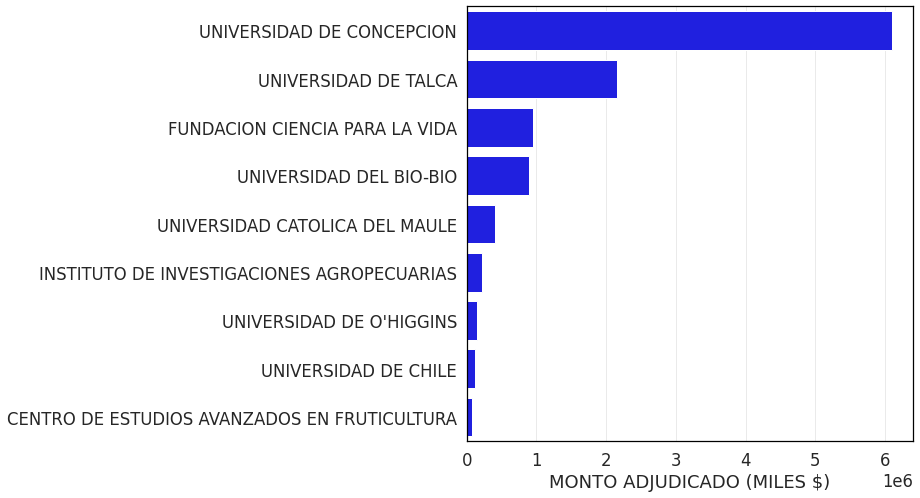

In [66]:
sns.set(font_scale=1.5, rc={"figure.figsize": (8, 8)}, style="whitegrid")
matplotlib.rc("axes", edgecolor="#000000")
matplotlib.rc("grid", color="#eaeaea")

aa = df_fondequip.groupby(["INSTITUCION_PRINCIPAL"]).agg({"MONTO ADJUDICADO (MILES $)": "sum"}).reset_index().sort_values("MONTO ADJUDICADO (MILES $)", ascending=False)

g = sns.barplot(x="MONTO ADJUDICADO (MILES $)", y="INSTITUCION_PRINCIPAL", color="blue", data=aa)
# g.set_xlabel("")
g.set_ylabel("")

In [67]:
df_fondequip.groupby(["AREA_OCDE"]).agg({"CODIGO_PROYECTO": "count"})

,CODIGO_PROYECTO
AREA_OCDE,
CIENCIAS AGRICOLAS,17
CIENCIAS MEDICAS Y DE LA SALUD,7
CIENCIAS NATURALES,28
CIENCIAS SOCIALES,3
INGENIERIA Y TECNOLOGIA,12


In [68]:
df_auxiliar = df_postulaciones[df_postulaciones['SUBDIRECCION'].isin(['INVESTIGACION APLICADA','PROYECTOS DE INVESTIGACION'])].copy()
df_auxiliar = df_auxiliar[df_auxiliar['REGION DE EJECUCION']=='16. ÑUBLE']

#df_postulaciones.columns

In [69]:
df_adjudicaciones['SUBDIRECCION'].unique()

array(['PROYECTOS DE INVESTIGACION', 'INVESTIGACION APLICADA', 'CENTROS',
       'NO APLICA', 'REC'], dtype=object)

In [70]:
df_postulaciones['REGION DE EJECUCION'].unique()

array(['13. METROPOLITANA', '05. VALPARAISO', 'EXTRANJERO',
       '02. ANTOFAGASTA', '08. BIOBIO', '07. MAULE',
       '12. MAGALLANES Y ANTARTICA CHILENA', '09. LA ARAUCANIA',
       '14. LOS RIOS', '04. COQUIMBO', '10. LOS LAGOS',
       '15. ARICA Y PARINACOTA', '06. OHIGGINS', '03. ATACAMA',
       'SIN INFORMACION', '01. TARAPACA', '11. AYSEN', '16. ÑUBLE',
       'MULTIREGIONAL', 'NO APLICA'], dtype=object)

In [71]:
#planets_in_years = planets[planets.year.isin([2008, 2009])]
#planets_in_years.head()

df_postulaciones2 = df_postulaciones[df_postulaciones['REGION DE EJECUCION'].isin(['07. MAULE','08. BIOBIO','06. OHIGGINS', '16. ÑUBLE'])]

df_postulaciones2 = df_postulaciones2[df_postulaciones2['ESTADO_RESOLUCION_CONCURSO']=='ADJUDICADO']

In [72]:
df_postulaciones2.columns



Index(['CODIGO DEL PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO',
       'NOMBRE DEL CONCURSO', ' MONTO TOTAL ADJUDICADO (M$) ',
       'ESTADO_RESOLUCION_CONCURSO', 'DISCIPLINA OECD', 'REGION DE EJECUCION',
       'TIPO DE BENEFICIARIO', 'TIPO DE INSTITUCION', 'SEXO', 'AÑO DE FALLO',
       'MACRO ZONA'],
      dtype='object')

In [73]:
alt.Chart(df_postulaciones2).mark_bar().encode(
    x = 'REGION DE EJECUCION:Q',          # Columna en el eje X
    y = 'DISCIPLINA OECD:Q'        # Columna en el eje Y
)

alt.Chart(...)

In [76]:
#df_postulaciones.head()
df_adjudicaciones.columns

Index(['CODIGO_PROYECTO', 'N', 'SUBDIRECCION', 'PROGRAMA_CONICYT',
       'INSTRUMENTO', 'NOMBRE_CONCURSO', 'AÃO_CONCURSO', 'AÃO_FALLO',
       'NOMBRE_PROYECTO', 'AREA_OCDE', 'DISCIPLINA_DETALLE',
       'GRUPO_DE_EVALUACION', 'DURACION_MESES', 'TIPO_BENEFICIARIO',
       'NOMBRE_RESPONSABLE', 'SEXO', 'INSTITUCION_PRINCIPAL',
       'MACROZONA MINCIENCIA (segUn ax)', 'REGION_EJECUCION',
       'MONTO ADJUDICADO (MILES $)', 'M$_SINFO_NOSOLICITA'],
      dtype='object')

In [80]:
#para esto utilizaremos solo ciencias agricolas, aunque deberían incluirse otras más, pero por tiempo utilizaremos solo eso
df_programas = df_adjudicaciones[df_adjudicaciones['AREA_OCDE']=='CIENCIAS AGRICOLAS']

df_programas.columns

Index(['CODIGO_PROYECTO', 'N', 'SUBDIRECCION', 'PROGRAMA_CONICYT',
       'INSTRUMENTO', 'NOMBRE_CONCURSO', 'AÃO_CONCURSO', 'AÃO_FALLO',
       'NOMBRE_PROYECTO', 'AREA_OCDE', 'DISCIPLINA_DETALLE',
       'GRUPO_DE_EVALUACION', 'DURACION_MESES', 'TIPO_BENEFICIARIO',
       'NOMBRE_RESPONSABLE', 'SEXO', 'INSTITUCION_PRINCIPAL',
       'MACROZONA MINCIENCIA (segUn ax)', 'REGION_EJECUCION',
       'MONTO ADJUDICADO (MILES $)', 'M$_SINFO_NOSOLICITA'],
      dtype='object')